In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use("tableau-colorblind10")

In [2]:
df = pd.read_csv("./content/diabetes_prediction_dataset.csv")    ## importing the dataset
df.head(10)                                                      ## viewing the first 10 rows of the dataset.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## Exploratory Data Analysis

### Gender

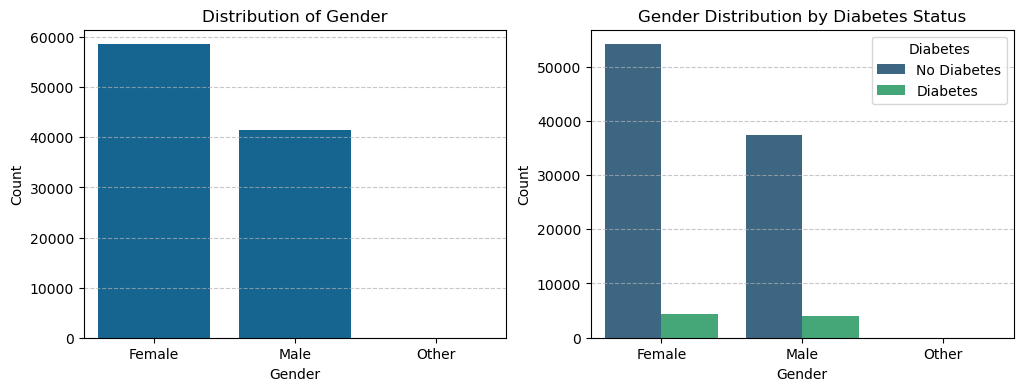

In [5]:
gender_distribution_plot = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='gender', hue='diabetes', palette='viridis', order=df['gender'].value_counts().index)
plt.title('Gender Distribution by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("./plots/gender_distribution.jpeg")
plt.show()

### Age

In [7]:
df['age'].describe() ## Viewing stats for the age column

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [8]:
age_distribution_plot = plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
plt.subplots_adjust(wspace=0.3, hspace=0.3)                      ## Setting padding between each subplot.
sns.histplot(data=df, x="age", kde=True, bins=4)                 ## Creating a histogram to view the distribution of ages.
plt.title("Age Distribution")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xlabel("Age")

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='heart_disease', y='age')                 ## Creating a box plot to view the occurence of heart disease in various ages.
plt.title('Age Distribution by heart disease status')
plt.xlabel('Heart disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='hypertension', y='age')                  ## Creating a box plot to view the occurence of hypertension in various ages.
plt.title('Age Distribution by hypertension status')
plt.xlabel('hypertension (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='diabetes', y='age')                      ## Creating a box plot to view the occurence of diabetes in various ages.
plt.title('Age Distribution by diabetes status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.kdeplot(data=df, x='age', hue='diabetes', fill=True, common_norm=False, palette='viridis')
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes])
                                     
plt.savefig("./plots/age_distribution.jpeg")
plt.show()

SyntaxError: unterminated string literal (detected at line 36) (3501539990.py, line 36)

#### **Observations**:
- From the distribution plot for age, we can observe that the majority of our data points are from individuals in the 41-60 age group.
- From the box plot for heart disease v/s age, we can observe that heart disease is quite prevelant in the 60 - 80 age group with quite a few outliers below 35.
- From the box plot for hypertension v/s age, we can observe that hypertension is quite prevelant in the 50 - 75 age group with a few outliers below 20.
- From the box plot for diabetes status v/s age, we can observe that diabetes is prevelant in the 50 - 75 age group with outliers below 22 years.

### Heart disease and Hypertension

In [ ]:
contingency_table = pd.crosstab(df['heart_disease'], df['hypertension'])
print("Contingency Table (Counts):")
print(contingency_table)

In [ ]:
contingency_table.plot(kind="bar", stacked=True, figsize=(10, 7))
plt.title('Relationship between Hypertension and Heart Disease', fontsize=16)
plt.xlabel('Hypertension (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()
plt.show()

In [ ]:
df[['heart_disease', 'hypertension']].corr()

#### **Observations**:
- From the contingency table and stacked bar chart, we can see that there is a correlation between heart disease and hypertension. However on further analysis of correlation coefficent (0.1212) we can infer that there is a weak linear correlation.  